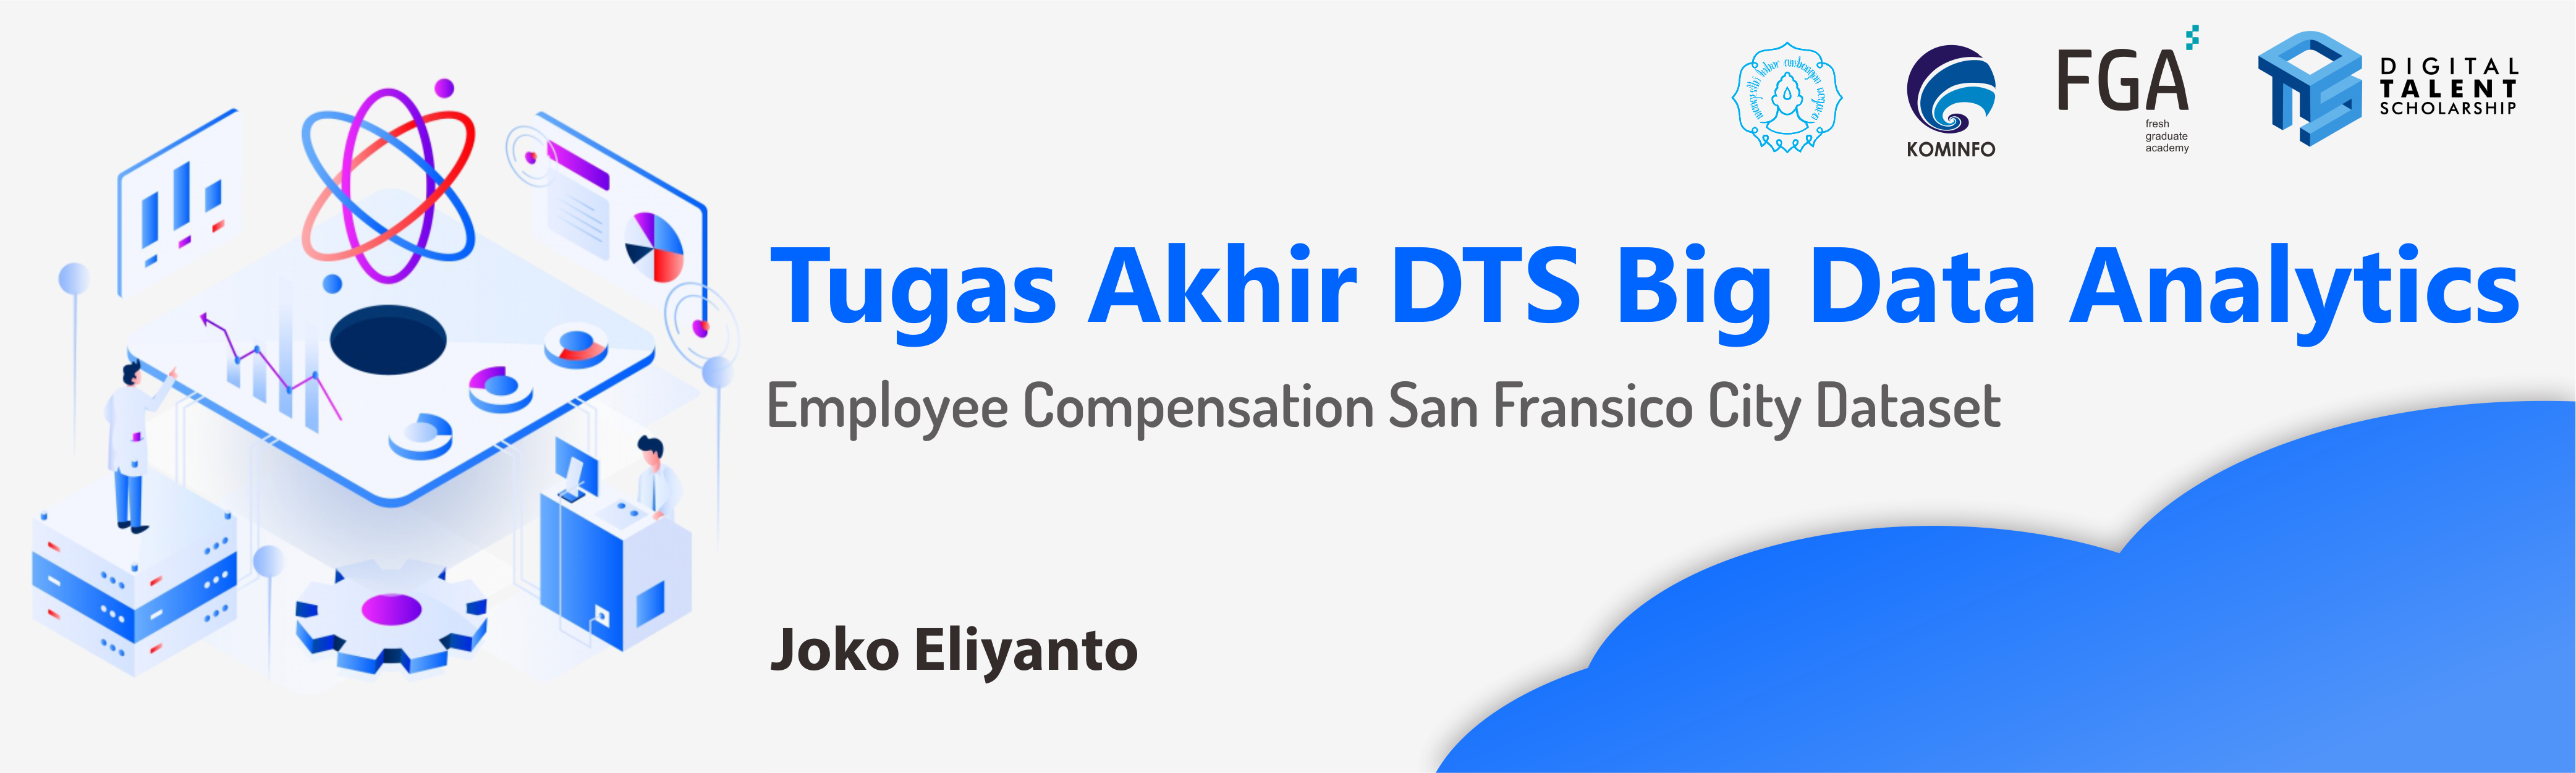

## Statistik Deskriptif Atribut Total Kompensasi

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
databersih=pd.read_csv('databersih.csv')

C:\Users\Joko\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#Memilih data number
data=databersih[['salaries', 'overtime','retirement','other salaries', 'total salary', 'health and dental', 'other benefits', 'total benefits','total compensation']]
data.head()

,salaries,overtime,retirement,other salaries,total salary,health and dental,other benefits,total benefits,total compensation
0,674.28,0.00,130.91,5.76,680.04,0.00,53.86,184.77,864.81
1,674.28,0.00,130.91,5.76,680.04,0.00,53.86,184.77,864.81
2,674.28,0.00,130.91,5.76,680.04,0.00,53.86,184.77,864.81
3,45425.24,0.00,8697.41,0.00,45425.24,5961.80,3662.72,28367.11,73792.35
4,107001.55,24209.84,38605.39,10059.98,141271.37,14308.44,2318.24,69852.19,211123.56


In [8]:
data.describe()

,salaries,overtime,retirement,other salaries,total salary,health and dental,other benefits,total benefits,total compensation
count,280110.000000,280110.000000,280110.000000,280110.000000,280110.000000,280110.000000,280110.000000,280110.000000,280110.000000
mean,61699.616747,4552.218686,12122.148619,3323.081974,69574.373960,9099.820387,4611.737485,26307.906390,95881.335498
std,45519.996700,11477.882693,9650.477135,6766.681009,53075.048172,6088.686399,4026.380547,18076.580581,69683.983066
min,0.050000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.870000
25%,21163.625000,0.000000,2561.682500,0.000000,22759.175000,3577.120000,1431.232500,8146.532500,31826.282500
50%,60475.530000,0.000000,12205.710000,600.000000,65687.045000,11457.850000,4110.105000,29566.680000,95532.145000
75%,90967.440000,2941.417500,18573.410000,3792.545000,101576.530000,13054.940000,6826.907500,39277.527500,141256.042500
max,645739.460000,304546.250000,120791.400000,229344.520000,652548.010000,36369.940000,38172.450000,160646.010000,813194.020000


## Problem Statement:
1. Pekerjaan apa dengan kompensasi terbesar?
2. Bagaimana hubungannya dengan lembur, tunjangan dan pensiunan pada pekerjaan tersebut?
3. Pekerjaan apa dengan kompensasi terkecil?
4. Bagaimana hubungannya dengan lembur, tunjangan dan pensiunan pada pekerjaan tersebut?

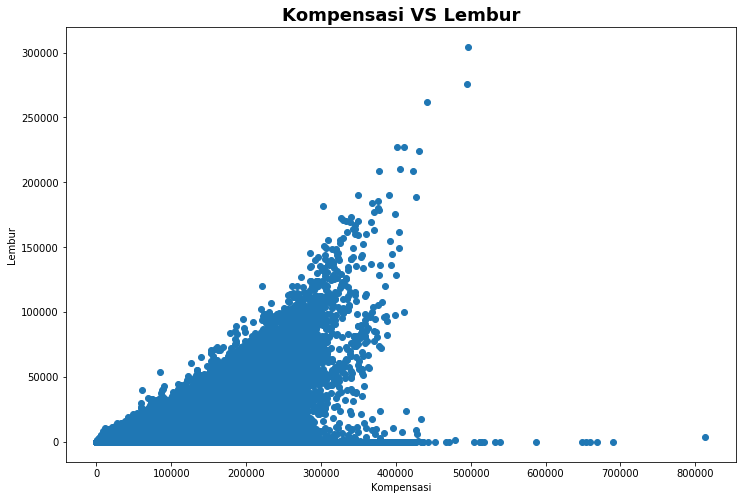

In [9]:
import matplotlib.pyplot as plt
import numpy as np

#Menentukan ukuran gambar
plt.figure(figsize=(12,8))
#Ploting
plt.title('Kompensasi VS Lembur', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.scatter(databersih['total compensation'], databersih['overtime'])


plt.xlabel('Kompensasi')
plt.ylabel('Lembur')

plt.savefig('Kompensasi VS Lembur.png', dpi=300)

plt.show()

### Catatan:
Total kompensasi dan gaji lembur di Kota San Fransisco memiliki korelasi yang rendah yaitu 0.455215, sehingga variabel gaji lembur bisa diabaikan. Selanjutnya menarik untuk dibahas yaitu total kompensasi karyawan, tunjangan dan pensiunan untuk menjawab pertanyaan 1 - 4.

In [14]:
dataurut1=databersih.sort_values(by='total compensation', ascending=0)
datarurut10besar=dataurut1[:20]
datashow=datarurut10besar[['Job','total compensation','overtime','retirement','total benefits']]
datashow.head()

,Job,total compensation,overtime,retirement,total benefits
3774,Police Officer 3,813194.02,3747.0,120791.40,160646.01
23903,Chief Investment Officer,689529.52,0.0,98677.06,151681.66
95509,Chief Investment Officer,668412.41,0.0,95600.00,134426.47
106150,Chief Investment Officer,659980.34,0.0,95045.63,132637.20
132276,Chief Investment Officer,653497.33,0.0,101306.01,138395.53


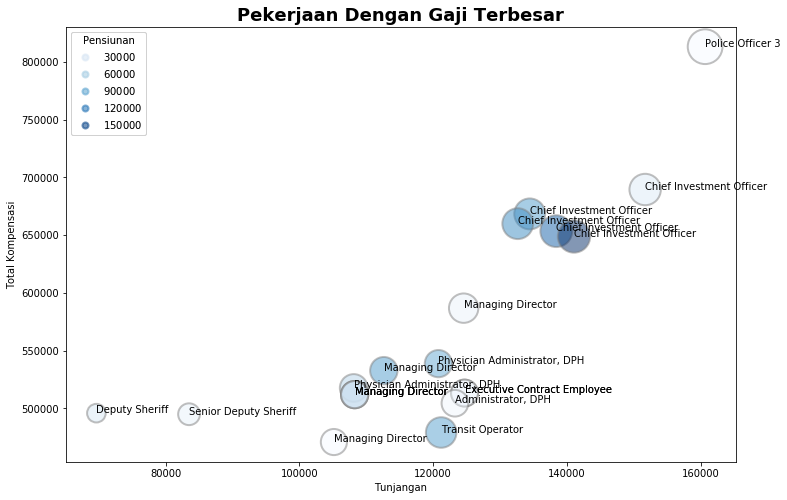

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

y=np.array(datarurut10besar['total compensation'])
z=np.array(datarurut10besar['total benefits'])
n=np.array(datarurut10besar['Job'])

fig, ax = plt.subplots(figsize=(12,8))
scatter=ax.scatter(z, y, s=datarurut10besar['retirement']/100, alpha=0.5,c=datarurut10besar.index, cmap="Blues", edgecolors="grey", linewidth=2 )

legend1 = ax.legend(*scatter.legend_elements(num=5),
                    loc="upper left", title="Pensiunan")
ax.add_artist(legend1)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

    plt.title('Pekerjaan Dengan Gaji Terbesar', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.ylabel('Total Kompensasi')
plt.xlabel('Tunjangan')
plt.savefig('Pekerjaan Dengan Gaji Terbesar.png', dpi=300)

### Catatan:
Berdasarkan gambar di atas dapat dilihat pekerjaan dengan total kompensasi tertinggi di Kota San Fransisco adalah Police Officer 3 kemudian disusul oleh pekerjaan Chief Invesment Officer dan Managing Director. Dari grafik di atas juga dapat dilihat berbagai pekerjaan dengan gaji tinggi, tunjangan tinggi dan pensiunan tinggi.

In [12]:
dataurut2=databersih.sort_values(by='total compensation', ascending=1)
datarurut10kecil=dataurut2[:20]
datashow=datarurut10kecil[['Job','total compensation','overtime','retirement','total benefits']]
datashow.head()

,Job,total compensation,overtime,retirement,total benefits
208779,Junior Management Assistant,0.87,0.0,0.13,0.30
219827,Junior Management Assistant,0.87,0.0,0.13,0.30
59279,Public Service Trainee,2.96,0.0,0.00,0.22
151791,Parking Control Officer,5.62,0.0,107.44,101.12
20853,Commissioner No Benefits,6.43,0.0,0.00,0.45


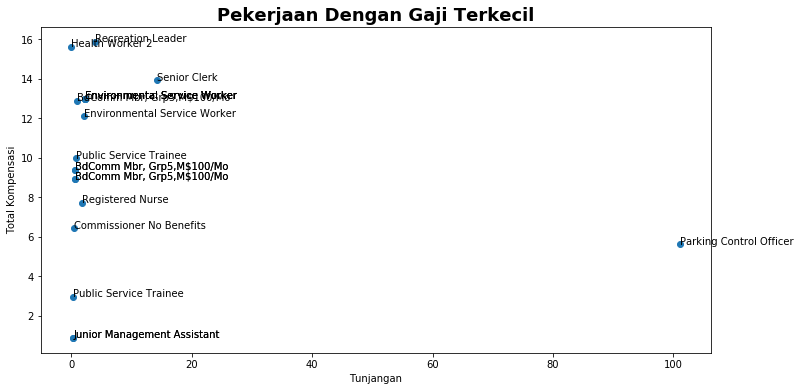

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

y=np.array(datarurut10kecil['total compensation'])
z=np.array(datarurut10kecil['total benefits'])
n=np.array(datarurut10kecil['Job'])

fig, ax = plt.subplots(figsize=(12,6))
scatter=ax.scatter(z, y)


for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

    plt.title('Pekerjaan Dengan Gaji Terkecil', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.ylabel('Total Kompensasi')
plt.xlabel('Tunjangan')
plt.savefig('Pekerjaan Dengan Gaji Terkeci;.png', dpi=300)

### Catatan:
Berdasarkan gambar di atas dapat dilihat tiga pekerjaan dengan total kompensasi terendah di Kota San Fransisco adalah Junior Management Assistant, Public Service Trainee, Commissioner No Benefits. Ketiga profesi tersebut tidak menyediakan uang lembur.